# Lab: CV w/CNNs

# Part 1: Libraries & Preprocessing

### Step 1: Libraries

Bring in the germane libraries.

In [131]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

### Step 2: Data

Download and fetch the data with the following Python code (Note: We will use faces.images for X.)

In [132]:
# Load the data
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X = faces.images
y = faces.target.reshape(-1, 1)   # reshape 1D array into a 2D column array
# -1 figures out how may rows automatically
# 1 = 1 column


In [133]:
print(X.shape)

(400, 64, 64)


### Step 3: Sample Image

Select an image from this dataset and display it (Hint: Use the plt.cm.gray color map with plt.imshow function).

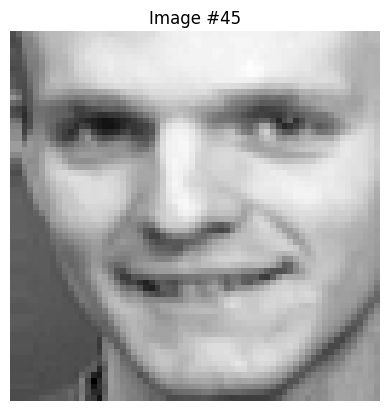

In [134]:
# Selecting an image
img_index = 45
example = X[img_index]

plt.imshow(example, cmap = plt.cm.gray)
plt.title(f"Image #{img_index}")
plt.axis('off')
plt.show()

### Step 4: Training and testing sets

Setup training and testing sets . Use a 50/50 split for each class (5 training images and 5 test images per person). Print the dimension of each of the feature (image) matrices. Because this is a small dataset, we will also use the test set for validation.

In [135]:
y = y.ravel()
classes = np.unique(y)
print(classes)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [136]:
# Creating the training and testing sets.
X_train, X_test = [], []
y_train, y_test = [], []

for person_id in np.unique(y):
    person_images = X[y == person_id]

    # First 5 images for training, next 5 for testing
    X_train.append(person_images[:5])
    X_test.append(person_images[5:])

    y_train.append([person_id]*5)
    y_test.append([person_id]*5)

# Stack into arrays
X_train = np.vstack(X_train)
X_test = np.vstack(X_test)
y_train = np.hstack(y_train)
y_test = np.hstack(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(200, 64, 64) (200, 64, 64) (200,) (200,)


### Step 5: Vector conversion

Convert the vector of response variables to a matrix with 40 columns, with indicators for which person it is (one-hot encoded vectors). Print the dimensions of the new response vectors.

In [137]:
# Conversion

# One-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes=40)
y_test_cat = to_categorical(y_test, num_classes=40)

# Print the shapes
print(y_train_cat.shape)
print(y_test_cat.shape)


(200, 40)
(200, 40)


### Step 6: Reshape arrays

Reshape the image arrays so that they have 4 dimensions: (number of images, width of image, height of image, number of channels). For example, the array of training images should be (200, 64, 64, 1). Print the dimensions of the new image arrays.

In [138]:
# Reshape
X_train = X_train.reshape(200, 64, 64, 1)
X_test = X_test.reshape(200, 64, 64, 1)

print(X_train.shape, X_test.shape)

(200, 64, 64, 1) (200, 64, 64, 1)


## Part 2: Model 1

### Step 7: Model 1's Architecture

Fit a convolutional neural network using the following architecture, and print the output from training.
*   1 convolutional layer with:
  * 16 filters (neurons)
  * a window size of 3
  * stride size of 1
  * ReLU activation function
  * padding so that the feature is the same size as the original image
*   1 max pooling layer with:
  * window size of 2
  * stride size of 2
  * no padding
*   1 fully connected output layer with:
  * 40 nodes for each face to predict
  * softmax activation function
*   For training, use the Adam optimizer, 20 epochs, a batch size of 10, and the categorical cross entropy loss function.

In [139]:
input_tensor = Input(shape=(64, 64, 1))

# Convolution Neural Network Model
model1 = Sequential()
model1.add(Conv2D(16, kernel_size=3, activation='relu', padding='same', input_shape=(64, 64, 1), strides=1))

model1.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model1.add(Flatten())
model1.add(Dense(40, activation='softmax'))


In [140]:
# Compiling model1
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.fit(X_train, y_train_cat, epochs=20, batch_size=10, validation_data=(X_test, y_test_cat))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.0000e+00 - loss: 4.1583 - val_accuracy: 0.1000 - val_loss: 3.6449
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.0836 - loss: 3.5942 - val_accuracy: 0.2550 - val_loss: 3.4411
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4287 - loss: 3.1980 - val_accuracy: 0.6200 - val_loss: 3.0491
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.8054 - loss: 2.5878 - val_accuracy: 0.4700 - val_loss: 2.6414
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.7918 - loss: 1.9377 - val_accuracy: 0.5300 - val_loss: 2.2472
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.8237 - loss: 1.4202 - val_accuracy: 0.6600 - val_loss: 1.7813
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9503 - loss: 0.9400 - val_accuracy: 0.7600 - val_loss: 1.4169
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9709 - loss: 0.5893 - val_accuracy: 0.7850

### Step 8: Model 1's loss and accuracy

Print the loss and accuracy on the test set.

In [141]:
# Loss and Accuracy
test_loss, test_acc = model1.evaluate(X_test, y_test_cat, verbose=1)

print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_acc:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8200 - loss: 0.7388
Test loss: 0.5847
Test accuracy: 0.8650


### Step 9: Print image

Pick one of the images from the test set, and print the image.

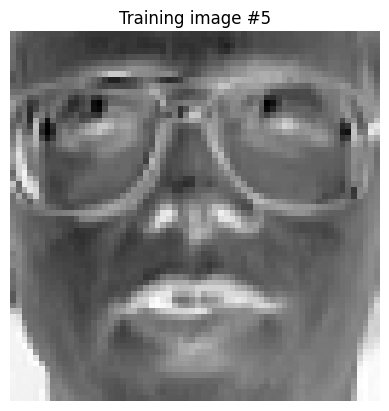

In [142]:
# An image
img_index=5

example = X_train[img_index, :, :, 0]

plt.imshow(example, cmap=plt.cm.binary)
plt.title(f"Training image #{img_index}")
plt.axis('off')
plt.show()

### Step 10: Feature maps

For the image you selected in (9), print the images of the feature maps from both the convolutional and pooling layers.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


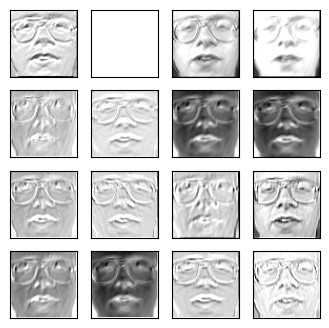

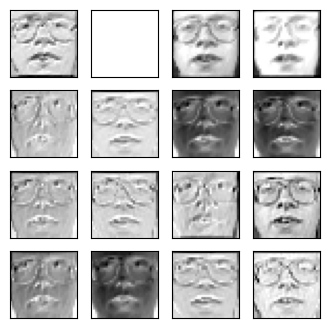

In [143]:
# Feature maps

# create list of layer outputs
layer_outputs = [layer.output for layer in model1.layers]

# create a model that will return the outputs at each layer
layers_model = keras.Model(inputs=model1.layers[0].input, outputs=layer_outputs)

# get predictions for each layer out of the network
outputs = layers_model.predict(example.reshape(1, 64, 64, 1))
conv_output = outputs[0]
pooling_output = outputs[1]

# plot feature maps from first convolutional layer
def PlotFeatureMaps(output_predictions):
  n_col = 4
  n_row = 4
  plt.figure(figsize=(n_col, n_row))
  for j in range(n_row * n_col):
    plt.subplot(n_row, n_col, j + 1)
    plt.imshow(output_predictions[0, :, :, j], cmap=plt.cm.binary)
    plt.xticks(())
    plt.yticks(())
  plt.show
  return None

PlotFeatureMaps(conv_output)
PlotFeatureMaps(pooling_output)

# For loop


plt.show()

## Part 3: Model 2




### Step 11: Model 2's Architecture

Fit the model from (7) again, but this time use a window size of 9 for the convolution layer.

In [144]:
# Change model1 so that it has a window size of 9.
model2 = Sequential()
model2.add(Conv2D(16, kernel_size=9, activation='relu', padding='same', input_shape=(64, 64, 1), strides=1))

model2.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model2.add(Flatten())
model2.add(Dense(40, activation='softmax'))
# Convolution Neural Network Model


In [145]:
# Compiling model2
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train_cat, epochs=20, batch_size=10, validation_data=(X_test, y_test_cat))

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.0131 - loss: 3.8113 - val_accuracy: 0.0450 - val_loss: 3.6858
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.1906 - loss: 3.6824 - val_accuracy: 0.1200 - val_loss: 3.6845
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.1101 - loss: 3.6782 - val_accuracy: 0.2000 - val_loss: 3.6444
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.1012 - loss: 3.5864 - val_accuracy: 0.2950 - val_loss: 3.5154
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - accuracy: 0.3707 - loss: 3.3453 - val_accuracy: 0.3550 - val_loss: 3.1529
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.5726 - loss: 2.7156 - val_accuracy: 0.4400 - val_loss: 2.6443
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.7220 - loss: 2.0159 - val_accuracy: 0.6500 - val_loss: 1.8531
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9601 - loss: 0.9737 - val_accuracy: 0.7100 - 

### Step 12: Model 2's loss and accuracy

Print the loss accuracy on the test set.

In [146]:
# Loss and Accuracy
test_loss2, test_acc2 = model2.evaluate(X_test, y_test_cat, verbose=1)

print(f"Test loss for model2: {test_loss2:.4f}")
print(f"Test accuracy for model2: {test_acc2:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.8151 - loss: 0.6808
Test loss for model2: 0.5059
Test accuracy for model2: 0.8750


### Step 13: Feature Maps

Print the feature maps for the model in for the same image you used in (9) and (10).

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


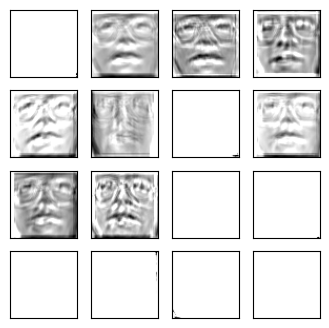

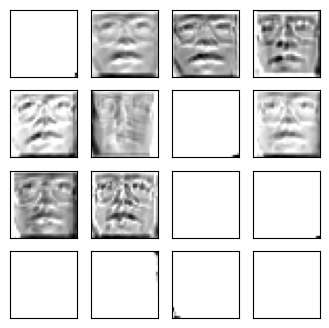

In [147]:
# Feature maps

# create list of layer outputs
layer_outputs = [layer.output for layer in model2.layers]

# create a model that will return the outputs at each layer
layers_model = keras.Model(inputs=model2.layers[0].input, outputs=layer_outputs)

# get predictions for each layer out of the network
outputs2 = layers_model.predict(example.reshape(1, 64, 64, 1))
conv_output2 = outputs2[0]
pooling_output2 = outputs2[1]

# plot feature maps from first convolutional layer
def PlotFeatureMaps(output_predictions):
  n_col = 4
  n_row = 4
  plt.figure(figsize=(n_col, n_row))
  for j in range(n_row * n_col):
    plt.subplot(n_row, n_col, j + 1)
    plt.imshow(output_predictions[0, :, :, j], cmap=plt.cm.binary)
    plt.xticks(())
    plt.yticks(())
  plt.show
  return None

PlotFeatureMaps(conv_output2)
PlotFeatureMaps(pooling_output2)

# For loop


plt.show()

## Part IV: Model comparison & model optimization


### Step 14: Model comparison

Comment on the differences in the features maps between this model and the previous one. Which network gave better predictions on the test set?

the feature maps for model2 had more blank feature maps than model1, but model2 had higher accuracy and lower loss. This indicates that fewer filters were strongly activated by the input image. This may be due to its larger convolutional kernel size of 9x9 which makes the filters more selective to broader spatial patterns. Model2 outperformed model 1 suggesting that its filters were more effective and disciminiative for the face recognition task.

### Step 15: Model 3- Optimized neural network

Optimize the neural network to improve the accuracy on the test set. You should try to get a better accuracy than both of the previous models.  Consider changing the following, then print the accuracy on the test set:
*   Number of convolutional and pooling layers
*   Number of filters in the convolutional layer
*   Window size
*   Number of fully connected layers and neurons
*   Regularization (L1/L2 penalty, dropout, early stopping)
*   Number of epochs and batch size

Call this model `model3`.

In [148]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.layers import BatchNormalization

# Convolution Neural Network Model
model3 = Sequential()

# add more convolutional layers to help the model learn hierarchical features
# L2 weight regularization to penalize overly large weights
model3.add(Conv2D(32, kernel_size=3, activation='relu', padding='same',
            kernel_regularizer=regularizers.l2(0.001), input_shape=(64, 64, 1), strides=1))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model3.add(Dropout(0.3))

model3.add(Conv2D(64, kernel_size=3, activation='relu', padding='same', strides=1))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model3.add(Dropout(0.3))

model3.add(Flatten())

# add dense hidden layer before the output to give the model more learning capacity
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(40, activation='softmax'))

In [149]:
# Compiling model3

# early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',      # or 'val_accuracy'
    patience=5,              # wait 5 epochs with no improvement
    restore_best_weights=True
)

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train_cat, epochs=50, batch_size=10, validation_data=(X_test, y_test_cat), callbacks=[early_stop], )

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.0480 - loss: 3.8180 - val_accuracy: 0.0300 - val_loss: 3.6903
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.0103 - loss: 3.6887 - val_accuracy: 0.0250 - val_loss: 3.6903
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - accuracy: 0.0161 - loss: 3.6912 - val_accuracy: 0.0200 - val_loss: 3.6902
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.0099 - loss: 3.6900 - val_accuracy: 0.0250 - val_loss: 3.6898
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step - accuracy: 0.0310 - loss: 3.6894 - val_accuracy: 0.0100 - val_loss: 3.6895
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - accuracy: 0.0464 - loss: 3.6880 - val_accuracy: 0.0350 - val_loss: 3.6855
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step - accuracy: 0.0333 - loss: 3.6874 - val_accuracy: 0.0950 - val_loss: 3.6817
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.0667 - loss: 3.6753 - val_accuracy: 0.

In [150]:
# Loss and Accuracy
test_loss3, test_acc3 = model3.evaluate(X_test, y_test_cat, verbose=1)

print(f"Test loss for model3: {test_loss3:.4f}")
print(f"Test accuracy for model3: {test_acc3:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8151 - loss: 0.7264
Test loss for model3: 0.5665
Test accuracy for model3: 0.8550


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


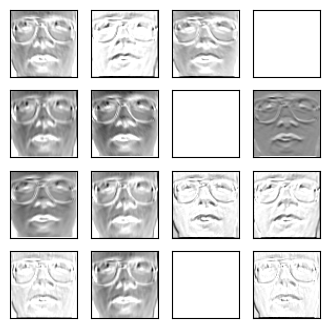

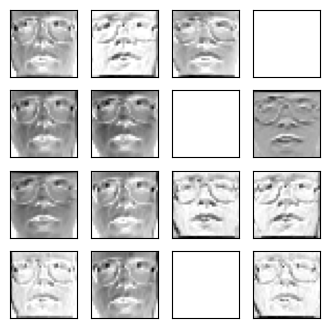

In [151]:
#  Feature maps

# create list of layer outputs
layer_outputs = [layer.output for layer in model3.layers]

# create a model that will return the outputs at each layer
layers_model = keras.Model(inputs=model3.layers[0].input, outputs=layer_outputs)

# get predictions for each layer out of the network
outputs = layers_model.predict(example.reshape(1, 64, 64, 1))
conv_output3 = outputs[0]
pooling_output3 = outputs[1]

# plot feature maps from first convolutional layer
def PlotFeatureMaps(output_predictions):
  n_col = 4
  n_row = 4
  plt.figure(figsize=(n_col, n_row))
  for j in range(n_row * n_col):
    plt.subplot(n_row, n_col, j + 1)
    plt.imshow(output_predictions[0, :, :, j], cmap=plt.cm.binary)
    plt.xticks(())
    plt.yticks(())
  plt.show
  return None

PlotFeatureMaps(conv_output3)
PlotFeatureMaps(pooling_output3)

# For loop


plt.show()

### Step 16: Reflection on Model 3

Write a few sentences describing how you optimized the model in this part. What worked well?

Originally, a 2nd convolutional and pooling layer were added to help the model learn hierarchical features, there was dropout added to randomly drop neurons to prevent overfitting, the number of filters was increased to add capacity to capture diverse features, fully connected layers before the output was added, regularization was implemented to prevent overfitting by randomly deactivating neurons, but accuracy decreased to 0.700.

early stopping was added to prevent overfitting, filter counts was increased, L2 weight regularization was added, and dropout layers after each convolutional block, and a fully connected hidden layer allowed accuracy to go up to 93.5% at one point